In [1]:
# Mawrer Amed Ramirez Martinez
# Avance de TOG IDI 4
# ms723737@iteso.mx

#Analisis de DATASET de distintas ventanas de tiempo.

import numpy as np
np.random.seed(1)
from tensorflow import set_random_seed 
set_random_seed(2)

import seaborn as sns
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import pyplot
from matplotlib.pyplot import figure

import pandas as pd
from pandas.plotting import autocorrelation_plot
from pandas.plotting import scatter_matrix
import math as m
import os, glob

from influxdb import InfluxDBClient
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import linregress

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
FILE_NAME = "EURUSD_1H"

In [3]:
pwd = os.getcwd()
source_data = os.path.join(pwd, r'../../../Datasets/Junio2020/dukas/EURUSD/')
filenames = glob.glob(source_data + "/*.csv")
filenames.sort()
for file in filenames:
    print(os.path.basename(file))


EURUSD_ASK_1_H_01.01.2004-19.11.2019.csv
EURUSD_Candlestick_1_D_ASK_01.01.2018-31.05.2020_2.csv
EURUSD_Candlestick_1_Hour_ASK_01.01.2018-31.05.2020.csv
EURUSD_Candlestick_1_M_ASK_01.01.2018-31.05.2020.csv
EURUSD_Candlestick_2_Hour_ASK_01.01.2018-31.05.2020.csv
EURUSD_Candlestick_4_Hour_ASK_01.01.2018-31.05.2020.csv


In [42]:
# 1M 201d
dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y')
DF_EURUSD_ASK_1H_OLD = pd.read_csv(filenames[0], header=0, parse_dates=dateparse)
DF_EURUSD_ASK_1H_OLD.head()

,Gmt time,Open,High,Low,Close,Volume
0,01.01.2004 00:00:00.000,1.25950,1.25960,1.25826,1.25910,6654.2002
1,01.01.2004 01:00:00.000,1.25958,1.25960,1.25947,1.25951,660.6000
2,01.01.2004 02:00:00.000,1.25955,1.25962,1.25944,1.25951,2091.0000
3,01.01.2004 03:00:00.000,1.25950,1.25965,1.25834,1.25869,10003.0996
4,01.01.2004 04:00:00.000,1.25908,1.25960,1.25843,1.25950,7603.3999


In [43]:
DF_EURUSD_ASK_1H_OLD['datetime']= pd.to_datetime(DF_EURUSD_ASK_1H_OLD['Gmt time'])
print(DF_EURUSD_ASK_1H_OLD.head(10))

                  Gmt time     Open     High      Low    Close      Volume  \
0  01.01.2004 00:00:00.000  1.25950  1.25960  1.25826  1.25910   6654.2002   
1  01.01.2004 01:00:00.000  1.25958  1.25960  1.25947  1.25951    660.6000   
2  01.01.2004 02:00:00.000  1.25955  1.25962  1.25944  1.25951   2091.0000   
3  01.01.2004 03:00:00.000  1.25950  1.25965  1.25834  1.25869  10003.0996   
4  01.01.2004 04:00:00.000  1.25908  1.25960  1.25843  1.25950   7603.3999   
5  01.01.2004 05:00:00.000  1.25907  1.25960  1.25825  1.25955  10862.5996   
6  01.01.2004 06:00:00.000  1.25914  1.25960  1.25482  1.25948  10160.4004   
7  01.01.2004 07:00:00.000  1.25938  1.25950  1.24698  1.25910  13008.2002   
8  01.01.2004 08:00:00.000  1.25900  1.25953  1.25726  1.25907   5518.8999   
9  01.01.2004 09:00:00.000  1.25915  1.25953  1.25864  1.25917   7611.2002   

             datetime  
0 2004-01-01 00:00:00  
1 2004-01-01 01:00:00  
2 2004-01-01 02:00:00  
3 2004-01-01 03:00:00  
4 2004-01-01 04:00:00

In [44]:
DF_EURUSD_ASK_1H_OLD.set_index('Gmt time', inplace=True)


In [45]:
DF_EURUSD_ASK_1H_OLD.head()

,Open,High,Low,Close,Volume,datetime
Gmt time,,,,,,
01.01.2004 00:00:00.000,1.25950,1.25960,1.25826,1.25910,6654.2002,2004-01-01 00:00:00
01.01.2004 01:00:00.000,1.25958,1.25960,1.25947,1.25951,660.6000,2004-01-01 01:00:00
01.01.2004 02:00:00.000,1.25955,1.25962,1.25944,1.25951,2091.0000,2004-01-01 02:00:00
01.01.2004 03:00:00.000,1.25950,1.25965,1.25834,1.25869,10003.0996,2004-01-01 03:00:00
01.01.2004 04:00:00.000,1.25908,1.25960,1.25843,1.25950,7603.3999,2004-01-01 04:00:00


(99430, 6)


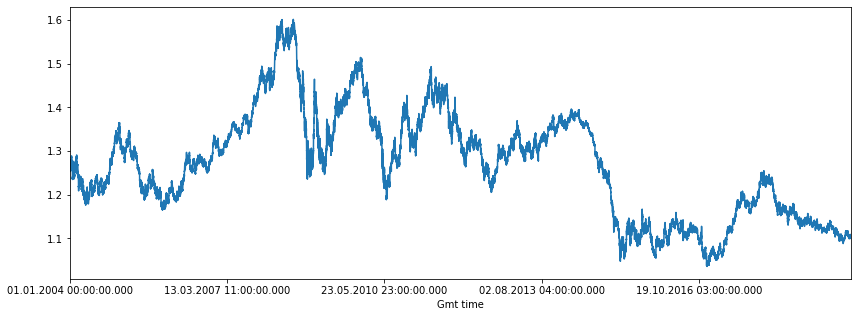

In [50]:
print(DF_EURUSD_ASK_1H_OLD.shape)
plt.figure(figsize=(14,5))
DF_EURUSD_ASK_1H_OLD['Close'].plot()
plt.show()

In [20]:
# 1H 
dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y %H:%M:%S.%f')
DF_EURUSD_ASK_1H_OLD = pd.read_csv(filenames[0], index_col=0, header=0)
DF_EURUSD_ASK_1H_OLD['Pct_Range'] = DF_EURUSD_ASK_1H_OLD['Close'].pct_change()
DF_EURUSD_ASK_1H_OLD['Pct_Range'].fillna(0, inplace=True)
DF_EURUSD_ASK_1H_OLD.head()

,Open,High,Low,Close,Volume,Pct_Range
Gmt time,,,,,,
01.01.2004 00:00:00.000,1.25950,1.25960,1.25826,1.25910,6654.2002,0.000000
01.01.2004 01:00:00.000,1.25958,1.25960,1.25947,1.25951,660.6000,0.000326
01.01.2004 02:00:00.000,1.25955,1.25962,1.25944,1.25951,2091.0000,0.000000
01.01.2004 03:00:00.000,1.25950,1.25965,1.25834,1.25869,10003.0996,-0.000651
01.01.2004 04:00:00.000,1.25908,1.25960,1.25843,1.25950,7603.3999,0.000644


(99430, 6)


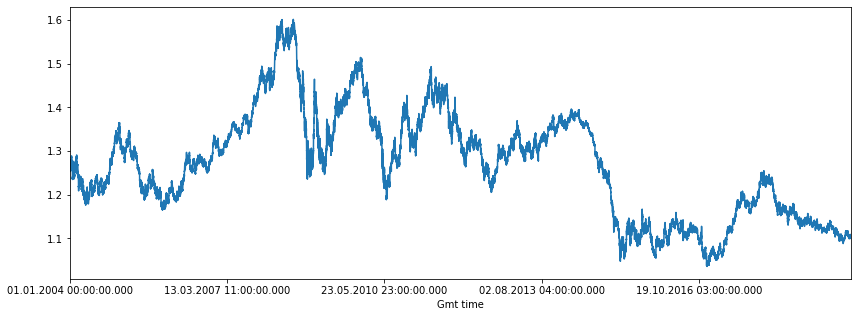

In [25]:
print(DF_EURUSD_ASK_1H_OLD.shape)
plt.figure(figsize=(14,5))
DF_EURUSD_ASK_1H_OLD['Close'][:].plot()
plt.show()

In [27]:
# 1 DIA
dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y %H:%M:%S.%f')
DF_EURUSD_ASK_1D = pd.read_csv(filenames[1], parse_dates=['Local time'], index_col=0, header=0)
DF_EURUSD_ASK_1D['Pct_Range'] = DF_EURUSD_ASK_1D['Close'].pct_change()
DF_EURUSD_ASK_1D['Pct_Range'].fillna(0, inplace=True)
DF_EURUSD_ASK_1D.head()

,Open,High,Low,Close,Volume,Pct_Range
Local time,,,,,,
2017-12-31 18:00:00+06:00,1.20143,1.20173,1.20044,1.20110,7920.7500,0.000000
2018-01-01 18:00:00+06:00,1.20109,1.20813,1.20081,1.20618,197721.2031,0.004229
2018-02-01 18:00:00+06:00,1.20619,1.20641,1.20015,1.20112,203173.8750,-0.004195
2018-03-01 18:00:00+06:00,1.20112,1.20890,1.20046,1.20669,209319.6875,0.004637
2018-04-01 18:00:00+06:00,1.20666,1.20833,1.20209,1.20314,193302.4063,-0.002942


(757, 6)


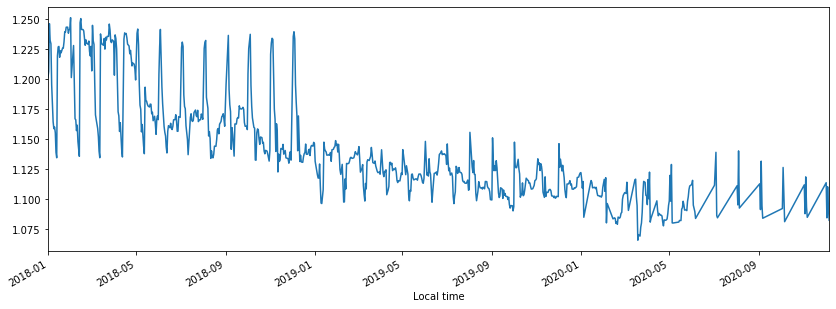

In [28]:
print(DF_EURUSD_ASK_1D.shape)
plt.figure(figsize=(14,5))
DF_EURUSD_ASK_1D['Close'][:].plot()
plt.show()

In [4]:
DF_EURUSD_ASK_1D = pd.read_csv(filenames[1], header=0)
DF_EURUSD_ASK_1D['Pct_Range'] = DF_EURUSD_ASK_1D['Close'].pct_change()
DF_EURUSD_ASK_1D['Pct_Range'].fillna(0.000001, inplace=True)
DF_EURUSD_ASK_1D.head()

,Local time,Open,High,Low,Close,Volume,Pct_Range
0,31.12.2017 18:00:00.000 GMT-0600,1.20143,1.20173,1.20044,1.20110,7920.7500,0.000001
1,01.01.2018 18:00:00.000 GMT-0600,1.20109,1.20813,1.20081,1.20618,197721.2031,0.004229
2,02.01.2018 18:00:00.000 GMT-0600,1.20619,1.20641,1.20015,1.20112,203173.8750,-0.004195
3,03.01.2018 18:00:00.000 GMT-0600,1.20112,1.20890,1.20046,1.20669,209319.6875,0.004637
4,04.01.2018 18:00:00.000 GMT-0600,1.20666,1.20833,1.20209,1.20314,193302.4063,-0.002942


(757, 7)


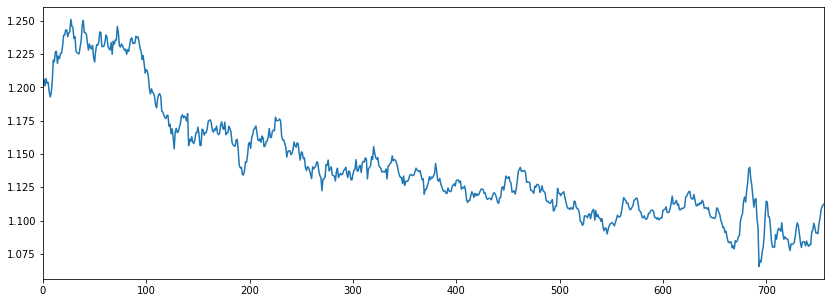

In [5]:
print(DF_EURUSD_ASK_1D.shape)
plt.figure(figsize=(14,5))
DF_EURUSD_ASK_1D['Close'][:].plot()
plt.show()

In [14]:
# 1 Hora
DF_EURUSD_ASK_1H = pd.read_csv(filenames[2], header=0)
DF_EURUSD_ASK_1H['Pct_Range'] = DF_EURUSD_ASK_1D['Close'].pct_change()
DF_EURUSD_ASK_1H['Pct_Range'].fillna(0, inplace=True)
DF_EURUSD_ASK_1H.head()

,Local time,Open,High,Low,Close,Volume
0,01.01.2018 16:00:00.000 GMT-0600,1.20143,1.20173,1.20062,1.20158,1623.5100
1,01.01.2018 17:00:00.000 GMT-0600,1.20158,1.20161,1.20044,1.20110,6297.2402
2,01.01.2018 18:00:00.000 GMT-0600,1.20109,1.20178,1.20096,1.20162,3564.4600
3,01.01.2018 19:00:00.000 GMT-0600,1.20162,1.20232,1.20141,1.20159,6219.6899
4,01.01.2018 20:00:00.000 GMT-0600,1.20157,1.20165,1.20081,1.20096,5386.5098


(15028, 6)


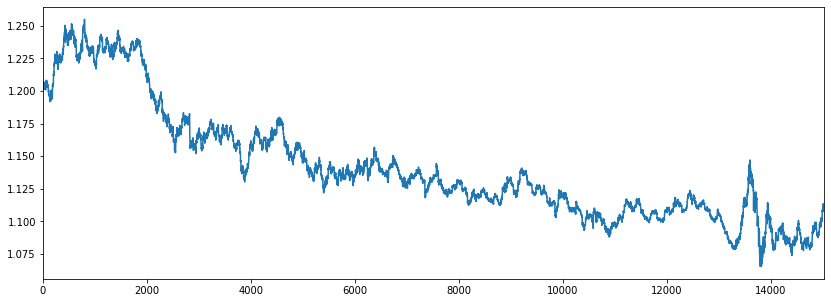

In [15]:
print(DF_EURUSD_ASK_1H.shape)
plt.figure(figsize=(14,5))
DF_EURUSD_ASK_1H['Close'][:].plot()
plt.show()

In [8]:
# 1 Minuto
DF_EURUSD_ASK_1M = pd.read_csv(filenames[3], header=0)
DF_EURUSD_ASK_1M['Pct_Range'] = DF_EURUSD_ASK_1M['Close'].pct_change()
DF_EURUSD_ASK_1M['Pct_Range'].fillna(0, inplace=True)
DF_EURUSD_ASK_1M.head()

,Local time,Open,High,Low,Close,Volume,Pct_Range
0,01.01.2018 16:00:00.000 GMT-0600,1.20143,1.20148,1.20115,1.20115,10.50,0.000000
1,01.01.2018 16:01:00.000 GMT-0600,1.20115,1.20115,1.20087,1.20095,12.75,-0.000167
2,01.01.2018 16:02:00.000 GMT-0600,1.20095,1.20095,1.20095,1.20095,3.75,0.000000
3,01.01.2018 16:03:00.000 GMT-0600,1.20098,1.20115,1.20096,1.20113,11.99,0.000150
4,01.01.2018 16:04:00.000 GMT-0600,1.20109,1.20112,1.20109,1.20112,9.00,-0.000008


(900959, 7)


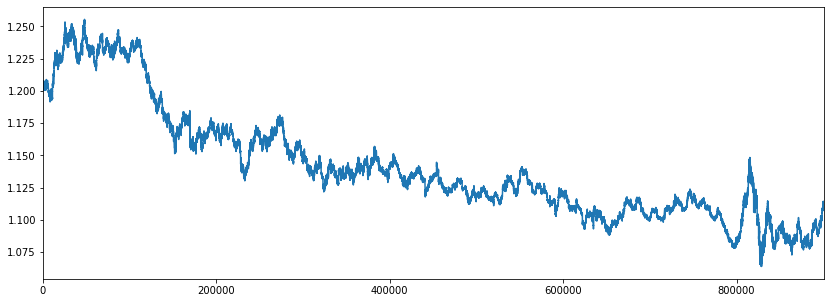

In [9]:
print(DF_EURUSD_ASK_1M.shape)
plt.figure(figsize=(14,5))
DF_EURUSD_ASK_1M['Close'][:].plot()
plt.show()

In [10]:
# 2 HRs
DF_EURUSD_ASK_2H = pd.read_csv(filenames[4], header=0)
DF_EURUSD_ASK_2H['Pct_Range'] = DF_EURUSD_ASK_2H['Close'].pct_change()
DF_EURUSD_ASK_2H['Pct_Range'].fillna(0, inplace=True)
DF_EURUSD_ASK_2H.head()

,Local time,Open,High,Low,Close,Volume,Pct_Range
0,01.01.2018 16:00:00.000 GMT-0600,1.20143,1.20173,1.20044,1.20110,7920.7502,0.000000
1,01.01.2018 18:00:00.000 GMT-0600,1.20109,1.20232,1.20096,1.20159,9784.1499,0.000408
2,01.01.2018 20:00:00.000 GMT-0600,1.20157,1.20214,1.20081,1.20122,10964.2100,-0.000308
3,01.01.2018 22:00:00.000 GMT-0600,1.20121,1.20247,1.20117,1.20247,8578.4400,0.001041
4,02.01.2018 00:00:00.000 GMT-0600,1.20245,1.20384,1.20230,1.20363,18118.8901,0.000965


(7596, 7)


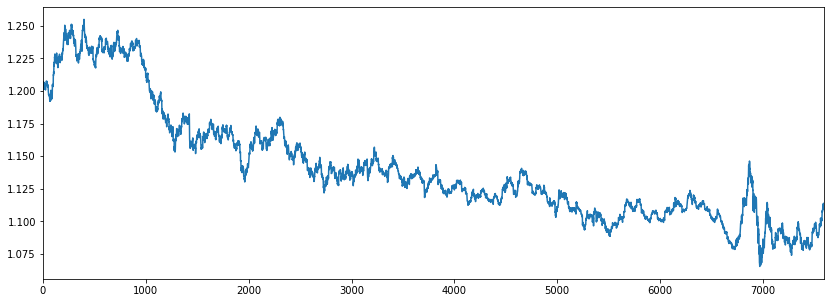

In [11]:
print(DF_EURUSD_ASK_2H.shape)
plt.figure(figsize=(14,5))
DF_EURUSD_ASK_2H['Close'][:].plot()
plt.show()

In [12]:
# 4 HRs
DF_EURUSD_ASK_4H = pd.read_csv(filenames[5], header=0)
DF_EURUSD_ASK_4H['Pct_Range'] = DF_EURUSD_ASK_4H['Close'].pct_change()
DF_EURUSD_ASK_4H['Pct_Range'].fillna(0, inplace=True)
DF_EURUSD_ASK_4H.head()

,Local time,Open,High,Low,Close,Volume,Pct_Range
0,01.01.2018 14:00:00.000 GMT-0600,1.20143,1.20173,1.20044,1.20110,7920.7502,0.000000
1,01.01.2018 18:00:00.000 GMT-0600,1.20109,1.20232,1.20081,1.20122,20748.3599,0.000100
2,01.01.2018 22:00:00.000 GMT-0600,1.20121,1.20384,1.20117,1.20363,26697.3301,0.002006
3,02.01.2018 02:00:00.000 GMT-0600,1.20363,1.20813,1.20325,1.20596,44005.5498,0.001936
4,02.01.2018 06:00:00.000 GMT-0600,1.20594,1.20690,1.20263,1.20446,51279.0508,-0.001244


(3887, 7)


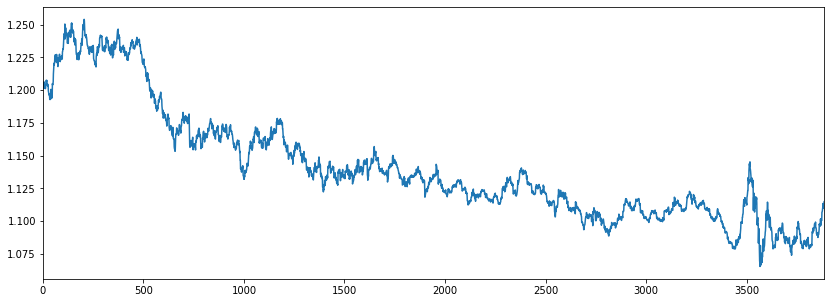

In [13]:
print(DF_EURUSD_ASK_4H.shape)
plt.figure(figsize=(14,5))
DF_EURUSD_ASK_4H['Close'][:].plot()
plt.show()

(757, 7)


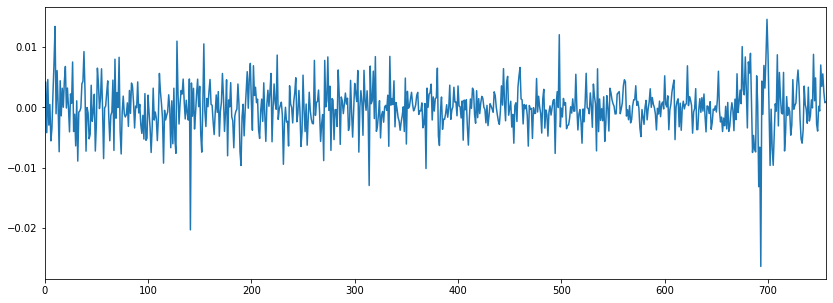

In [6]:
print(DF_EURUSD_ASK_1D.shape)
plt.figure(figsize=(14,5))
DF_EURUSD_ASK_1D['Pct_Range'][:].plot()
plt.show()

In [7]:
DF_EURUSD_ASK_1D['Ln_Close'] = np.log(DF_EURUSD_ASK_1D['Close']/DF_EURUSD_ASK_1D['Close'].shift())
DF_EURUSD_ASK_1D['Ln_Close'].fillna(0, inplace=True)
DF_EURUSD_ASK_1D.head()

,Local time,Open,High,Low,Close,Volume,Pct_Range,Ln_Close
0,31.12.2017 18:00:00.000 GMT-0600,1.20143,1.20173,1.20044,1.20110,7920.7500,0.000001,0.000000
1,01.01.2018 18:00:00.000 GMT-0600,1.20109,1.20813,1.20081,1.20618,197721.2031,0.004229,0.004221
2,02.01.2018 18:00:00.000 GMT-0600,1.20619,1.20641,1.20015,1.20112,203173.8750,-0.004195,-0.004204
3,03.01.2018 18:00:00.000 GMT-0600,1.20112,1.20890,1.20046,1.20669,209319.6875,0.004637,0.004627
4,04.01.2018 18:00:00.000 GMT-0600,1.20666,1.20833,1.20209,1.20314,193302.4063,-0.002942,-0.002946


(757, 8)


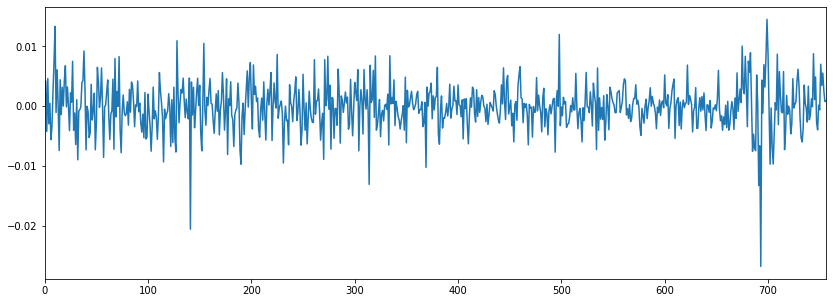

In [8]:
print(DF_EURUSD_ASK_1D.shape)
plt.figure(figsize=(14,5))
DF_EURUSD_ASK_1D['Ln_Close'][:].plot()
plt.show()

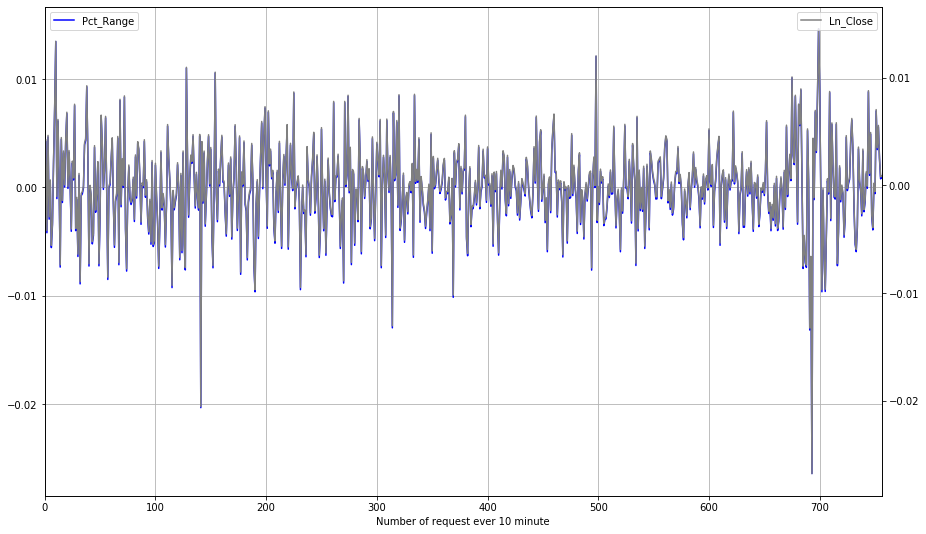

In [9]:
plt.figure(figsize=(15,9))

# Number of request every 10 minutes
DF_EURUSD_ASK_1D['Pct_Range'].plot(color='blue', grid=True)
plt.legend(loc='upper left')
plt.xlabel('Number of request ever 10 minute')


DF_EURUSD_ASK_1D['Ln_Close'].plot(color='gray',grid=True, secondary_y=True)
plt.legend(loc='upper right')

plt.show()

#Porque son tan similares?
#https://stats.stackexchange.com/questions/244199/why-is-it-that-natural-log-changes-are-percentage-changes-what-is-about-logs-th
    
    

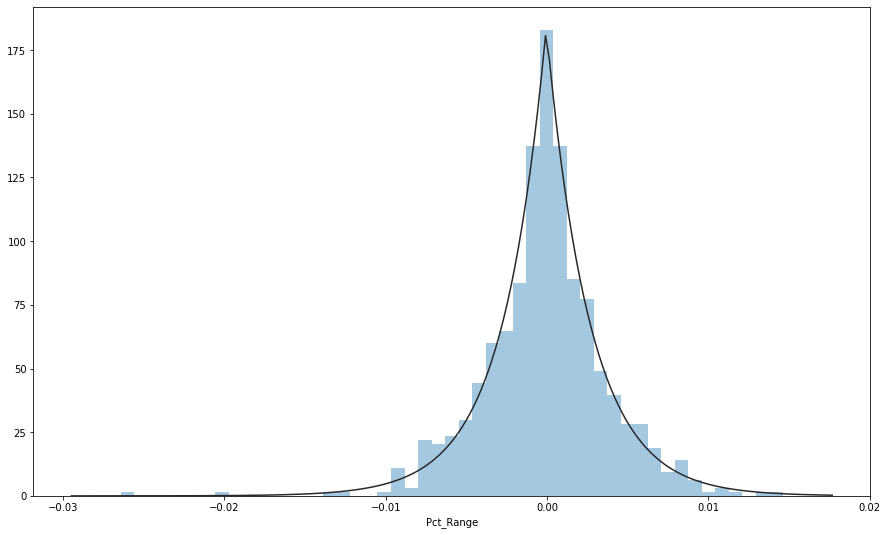

In [10]:
#Distribucion Normal
plt.figure(figsize=(15,9))
sns.distplot(DF_EURUSD_ASK_1D['Pct_Range'], fit=stats.laplace, kde=False)

In [11]:
DF_EURUSD_ASK_1D['Pct_Range'].describe()

count    757.000000
mean      -0.000094
std        0.003837
min       -0.026424
25%       -0.002044
50%       -0.000045
75%        0.001805
max        0.014630
Name: Pct_Range, dtype: float64

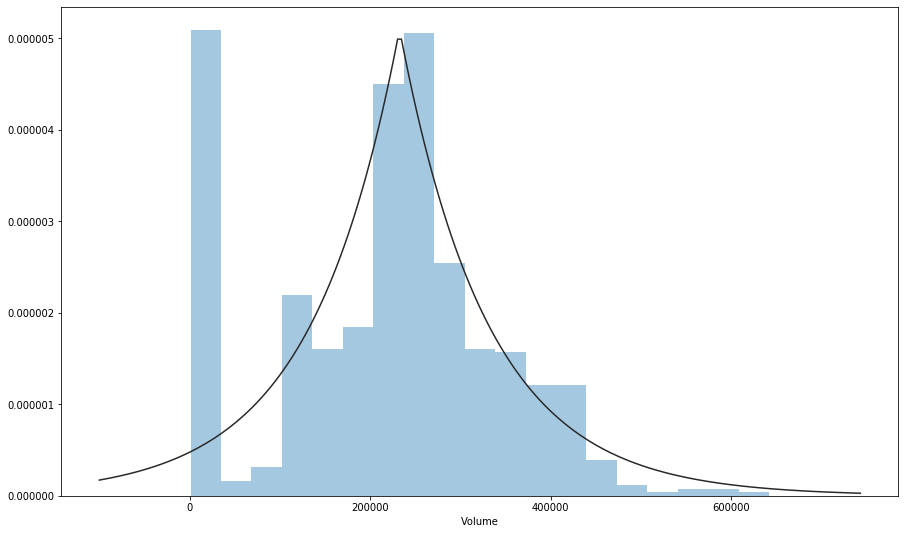

In [12]:
#Distribucion del Feature Volume
plt.figure(figsize=(15,9))
sns.distplot(DF_EURUSD_ASK_1D['Volume'], fit=stats.laplace, kde=False)

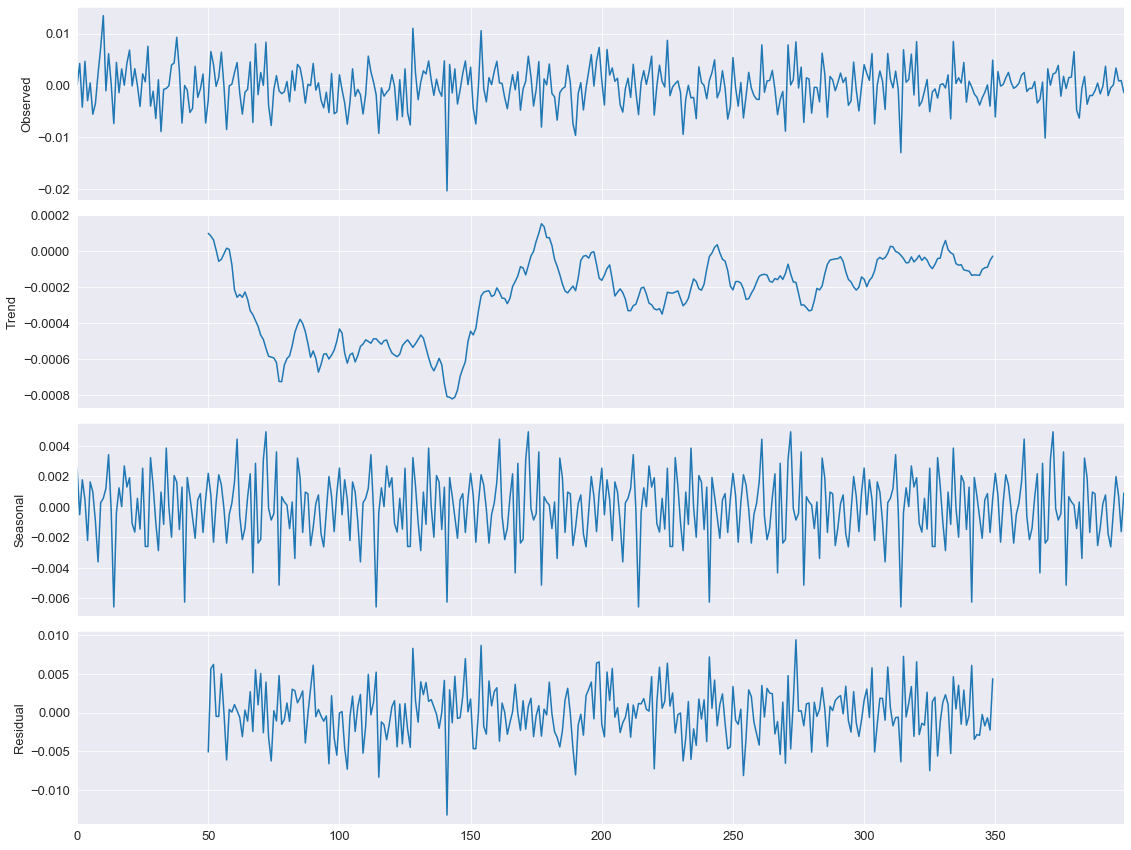

In [133]:
sns.set_style('darkgrid')
plt.rc('figure',figsize=(16,12))
plt.rc('font',size=13)

result = seasonal_decompose(DF_EURUSD_ASK_1D['Pct_Range'][:400], model='additive', freq=100)
result.plot()
pyplot.show()

In [26]:
s = pd.Series(DF_EURUSD_ASK_1D['Pct_Range'])
print(s.head())

0    0.000000
1    0.004229
2   -0.004195
3    0.004637
4   -0.002942
Name: Pct_Range, dtype: float64


In [28]:
s.value_counts()

-0.002639    1
-0.000017    1
-0.000370    1
-0.000153    1
-0.000152    1
 0.002189    1
-0.001856    1
 0.000366    1
 0.001170    1
 0.003885    1
-0.000769    1
 0.000766    1
 0.004416    1
 0.000785    1
 0.000072    1
 0.002217    1
 0.013452    1
 0.000024    1
-0.000385    1
-0.000283    1
-0.000535    1
-0.000595    1
-0.003145    1
 0.001019    1
 0.001726    1
 0.000558    1
 0.002609    1
 0.000762    1
 0.001261    1
 0.004050    1
            ..
-0.004401    1
 0.001922    1
-0.001398    1
-0.009449    1
 0.000787    1
-0.002664    1
 0.001063    1
-0.007395    1
 0.001628    1
-0.001340    1
-0.003804    1
 0.000153    1
-0.000065    1
 0.000956    1
-0.005255    1
 0.003358    1
-0.001186    1
 0.001281    1
 0.003990    1
-0.000016    1
 0.003184    1
-0.000549    1
-0.002762    1
-0.000415    1
 0.003202    1
-0.002259    1
 0.000926    1
 0.000485    1
-0.000099    1
 0.000000    1
Name: Pct_Range, Length: 757, dtype: int64

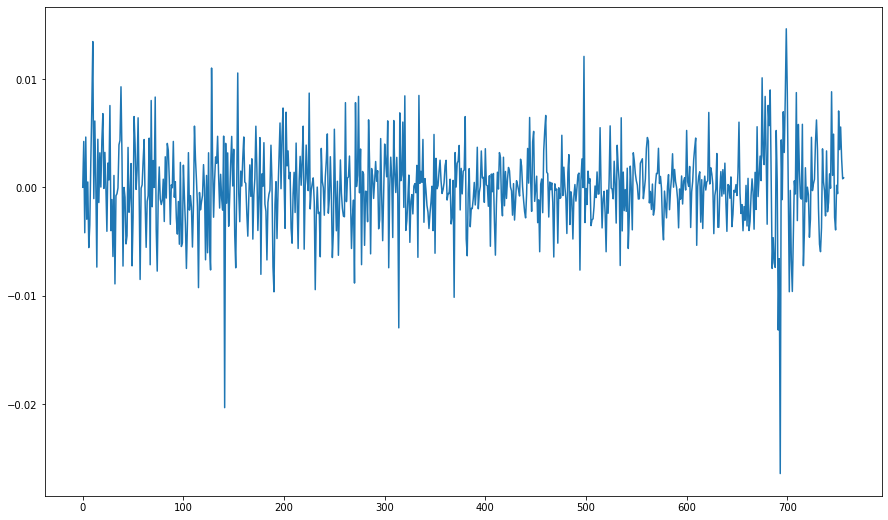

In [104]:
plt.figure(figsize=(15,9))
sns.lineplot(data = DF_EURUSD_ASK_1D['Pct_Range'])

In [70]:
shift_1 = DF_EURUSD_ASK_1D['Pct_Range'].autocorr(lag=1)
shift_1

0.04419008583857538

In [71]:
shift_10 = DF_EURUSD_ASK_1D['Pct_Range'].autocorr(lag=10)
shift_10

-0.03549489407839245

In [72]:
shift_300 = DF_EURUSD_ASK_1D['Pct_Range'].autocorr(lag=300)
shift_300

0.10796230615755105

<Figure size 1080x648 with 0 Axes>

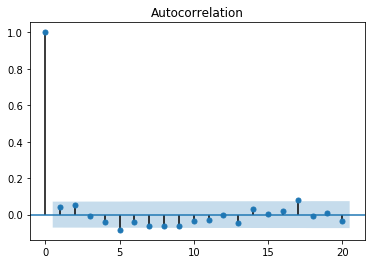

In [106]:
plt.figure(figsize=(15,9))
plot_acf(DF_EURUSD_ASK_1D['Pct_Range'], lags=20)
plt.show()

In [108]:
def difference(dataset, interval):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.DataFrame(diff, columns = ["Pct_Range_diff"])
diff = difference(DF_EURUSD_ASK_1D['Pct_Range'],1)
print(diff.shape)
print(diff.head())
print(DF_EURUSD_ASK_1D.head())


(756, 1)
   Pct_Range_diff
0        0.004229
1       -0.008425
2        0.008832
3       -0.007579
4        0.003432
                         Local time     Open     High      Low    Close  \
0  31.12.2017 18:00:00.000 GMT-0600  1.20143  1.20173  1.20044  1.20110   
1  01.01.2018 18:00:00.000 GMT-0600  1.20109  1.20813  1.20081  1.20618   
2  02.01.2018 18:00:00.000 GMT-0600  1.20619  1.20641  1.20015  1.20112   
3  03.01.2018 18:00:00.000 GMT-0600  1.20112  1.20890  1.20046  1.20669   
4  04.01.2018 18:00:00.000 GMT-0600  1.20666  1.20833  1.20209  1.20314   

        Volume  Pct_Range  Ln_Close  
0    7920.7500   0.000000  0.000000  
1  197721.2031   0.004229  0.004221  
2  203173.8750  -0.004195 -0.004204  
3  209319.6875   0.004637  0.004627  
4  193302.4063  -0.002942 -0.002946  


<Figure size 1080x648 with 0 Axes>

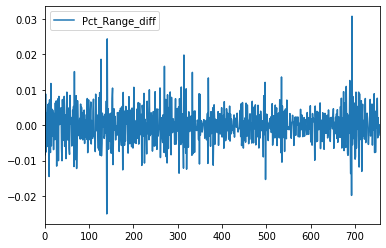

In [109]:
plt.figure(figsize=(15,9))
diff.plot(kind='line', y='Pct_Range_diff')
plt.show()

<Figure size 1080x648 with 0 Axes>

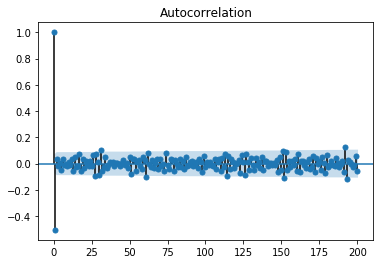

In [110]:
plt.figure(figsize=(15,9))
plot_acf(diff, lags=200)
plt.show()

(757, 8)


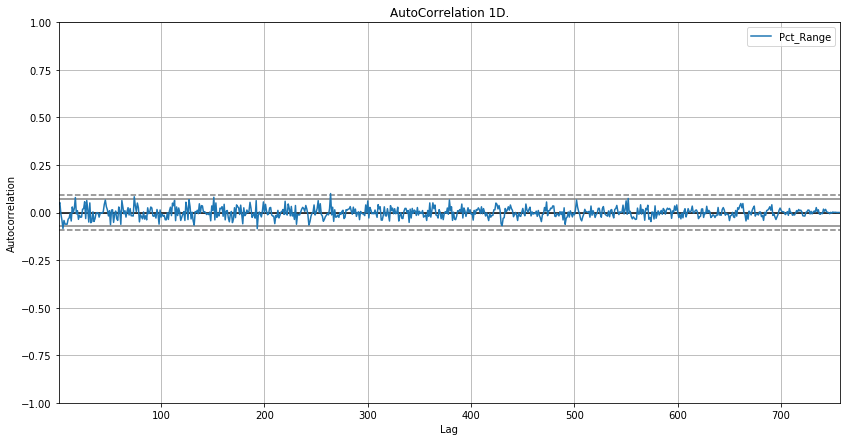

In [111]:
print(DF_EURUSD_ASK_1D.shape)
plt.figure(figsize=(14,7))
autocorrelation_plot(DF_EURUSD_ASK_1D['Pct_Range'],label = 'Pct_Range')
#autocorrelation_plot(DF_EURUSD_ASK_1D['Volume'],label = 'Volumen')
plt.title('AutoCorrelation 1D.')
pyplot.show()

In [ ]:
plt.figure(figsize=(14,5))
autocorrelation_plot(DF_EURUSD_ASK_1D['Close'][:],label = 'Close')
plt.title('AutoCorrelation 1D.')
pyplot.show()

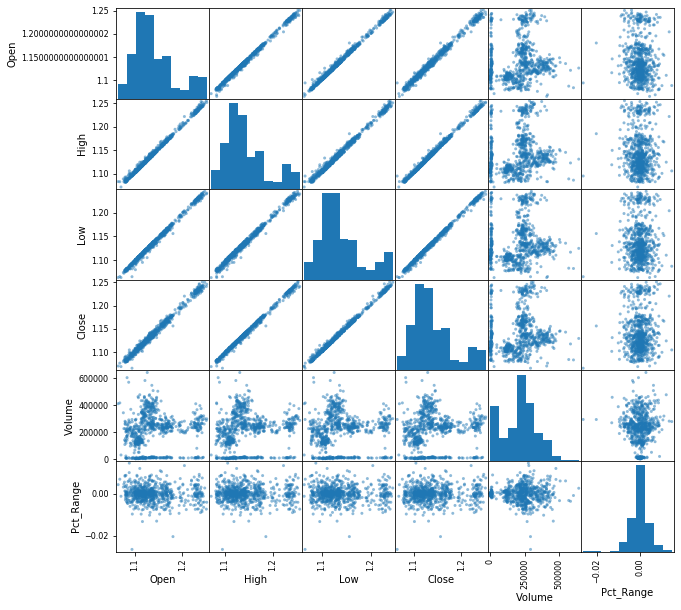

In [65]:
# Generate scatter matrix among all stock markets (and the price of SPY) to observe the association
sm = scatter_matrix(DF_EURUSD_ASK_1D, figsize=(10, 10))

In [43]:
#analisis a nivel hora, identificar cantidad de eventos en un dia, analizar por hora y agregarlos al dataset de dias. 
DF_EURUSD_ASK_1H.head()

DF_EURUSD_ASK_1H['Date']= pd.to_datetime(DF_EURUSD_ASK_1H['Local time'])
print (DF_EURUSD_ASK_1H['Date'].dtype)


object


In [39]:
DF_EURUSD_ASK_1H['Date'][-1:]

15027    2020-05-31 23:00:00+05:00
Name: Date, dtype: object

In [122]:
# 1 DIA
dateparse = lambda x: pd.datetime.strptime(x, '%d.%m.%Y %H:%M:%S.%f') #%d.%m.%Y %H:%M:%S.%f'
DF_EURUSD_ASK_1H_INDEX = pd.read_csv(filenames[2], date_parser=dateparse, parse_dates=['Gmt time'], index_col=0, header=0)
DF_EURUSD_ASK_1H_INDEX['Pct_Range'] = DF_EURUSD_ASK_1H_INDEX['Close'].pct_change()
DF_EURUSD_ASK_1H_INDEX['Pct_Range'].fillna(0, inplace=True)
DF_EURUSD_ASK_1H_INDEX.head()

,Open,High,Low,Close,Volume,Pct_Range
Gmt time,,,,,,
2018-01-01 22:00:00,1.20143,1.20173,1.20062,1.20158,1623.5100,0.000000
2018-01-01 23:00:00,1.20158,1.20161,1.20044,1.20110,6297.2402,-0.000399
2018-01-02 00:00:00,1.20109,1.20178,1.20096,1.20162,3564.4600,0.000433
2018-01-02 01:00:00,1.20162,1.20232,1.20141,1.20159,6219.6899,-0.000025
2018-01-02 02:00:00,1.20157,1.20165,1.20081,1.20096,5386.5098,-0.000524


In [123]:
DF_EURUSD_ASK_1H_INDEX['Date'] = DF_EURUSD_ASK_1H_INDEX.index
print(DF_EURUSD_ASK_1H_INDEX['Date'][1].weekday())


0


In [124]:
DF_EURUSD_ASK_1H_INDEX['Date'][50].weekday()

3

In [125]:
DF_EURUSD_ASK_1H_INDEX['my_dates'] = pd.to_datetime(DF_EURUSD_ASK_1H_INDEX['Date'])
DF_EURUSD_ASK_1H_INDEX

,Open,High,Low,Close,Volume,Pct_Range,Date,my_dates
Gmt time,,,,,,,,
2018-01-01 22:00:00,1.20143,1.20173,1.20062,1.20158,1623.5100,0.000000,2018-01-01 22:00:00,2018-01-01 22:00:00
2018-01-01 23:00:00,1.20158,1.20161,1.20044,1.20110,6297.2402,-0.000399,2018-01-01 23:00:00,2018-01-01 23:00:00
2018-01-02 00:00:00,1.20109,1.20178,1.20096,1.20162,3564.4600,0.000433,2018-01-02 00:00:00,2018-01-02 00:00:00
2018-01-02 01:00:00,1.20162,1.20232,1.20141,1.20159,6219.6899,-0.000025,2018-01-02 01:00:00,2018-01-02 01:00:00
2018-01-02 02:00:00,1.20157,1.20165,1.20081,1.20096,5386.5098,-0.000524,2018-01-02 02:00:00,2018-01-02 02:00:00
2018-01-02 03:00:00,1.20097,1.20214,1.20096,1.20122,5577.7002,0.000216,2018-01-02 03:00:00,2018-01-02 03:00:00
2018-01-02 04:00:00,1.20121,1.20196,1.20117,1.20175,4448.3301,0.000441,2018-01-02 04:00:00,2018-01-02 04:00:00
2018-01-02 05:00:00,1.20175,1.20247,1.20160,1.20247,4130.1099,0.000599,2018-01-02 05:00:00,2018-01-02 05:00:00
2018-01-02 06:00:00,1.20245,1.20306,1.20230,1.20289,6596.6499,0.000349,2018-01-02 06:00:00,2018-01-02 06:00:00


In [126]:
DF_EURUSD_ASK_1H_INDEX['day_of_week'] = DF_EURUSD_ASK_1H_INDEX['Date'].dt.day_name()
DF_EURUSD_ASK_1H_INDEX['num_day_of_week'] = DF_EURUSD_ASK_1H_INDEX['Date'].dt.weekday
DF_EURUSD_ASK_1H_INDEX.head(30)

,Open,High,Low,Close,Volume,Pct_Range,Date,my_dates,day_of_week,num_day_of_week
Gmt time,,,,,,,,,,
2018-01-01 22:00:00,1.20143,1.20173,1.20062,1.20158,1623.5100,0.000000,2018-01-01 22:00:00,2018-01-01 22:00:00,Monday,0
2018-01-01 23:00:00,1.20158,1.20161,1.20044,1.20110,6297.2402,-0.000399,2018-01-01 23:00:00,2018-01-01 23:00:00,Monday,0
2018-01-02 00:00:00,1.20109,1.20178,1.20096,1.20162,3564.4600,0.000433,2018-01-02 00:00:00,2018-01-02 00:00:00,Tuesday,1
2018-01-02 01:00:00,1.20162,1.20232,1.20141,1.20159,6219.6899,-0.000025,2018-01-02 01:00:00,2018-01-02 01:00:00,Tuesday,1
2018-01-02 02:00:00,1.20157,1.20165,1.20081,1.20096,5386.5098,-0.000524,2018-01-02 02:00:00,2018-01-02 02:00:00,Tuesday,1
2018-01-02 03:00:00,1.20097,1.20214,1.20096,1.20122,5577.7002,0.000216,2018-01-02 03:00:00,2018-01-02 03:00:00,Tuesday,1
2018-01-02 04:00:00,1.20121,1.20196,1.20117,1.20175,4448.3301,0.000441,2018-01-02 04:00:00,2018-01-02 04:00:00,Tuesday,1
2018-01-02 05:00:00,1.20175,1.20247,1.20160,1.20247,4130.1099,0.000599,2018-01-02 05:00:00,2018-01-02 05:00:00,Tuesday,1
2018-01-02 06:00:00,1.20245,1.20306,1.20230,1.20289,6596.6499,0.000349,2018-01-02 06:00:00,2018-01-02 06:00:00,Tuesday,1


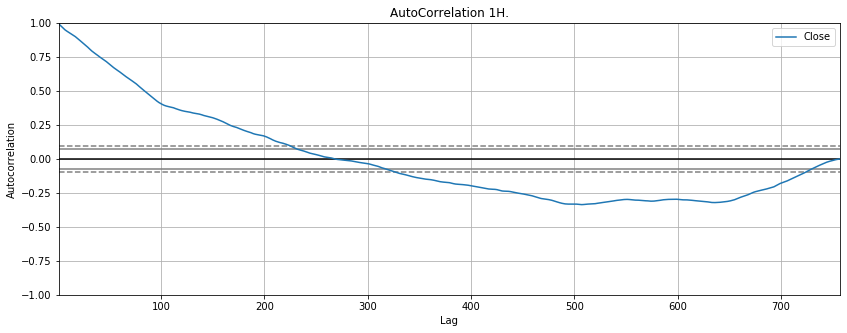

In [128]:
plt.figure(figsize=(14,5))
autocorrelation_plot(DF_EURUSD_ASK_1D['Close'][:],label = 'Close')
#autocorrelation_plot(DF_EURUSD_ASK_1D['Volume'],label = 'Volumen')
plt.title('AutoCorrelation 1H.')
pyplot.show()

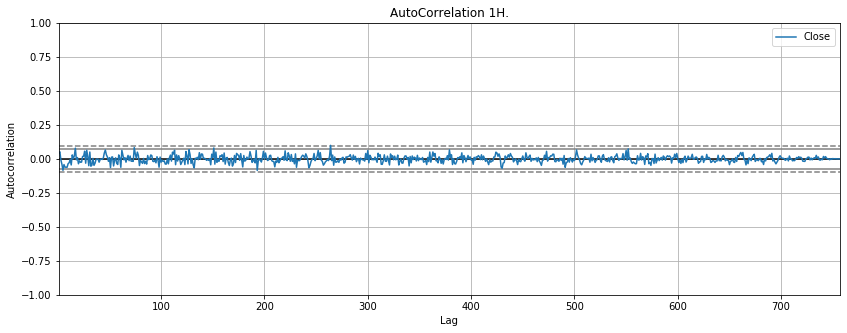

In [129]:
plt.figure(figsize=(14,5))
autocorrelation_plot(DF_EURUSD_ASK_1D['Pct_Range'][:],label = 'Close')
#autocorrelation_plot(DF_EURUSD_ASK_1D['Volume'],label = 'Volumen')
plt.title('AutoCorrelation 1H.')
pyplot.show()

In [131]:
def difference(dataset, interval):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.DataFrame(diff, columns = ["Pct_Range_diff"])
diff = difference(DF_EURUSD_ASK_1D['Pct_Range'],1)
print(diff.shape)
print(diff.head())
DF_EURUSD_ASK_1D['Pct_Range_diff'] = diff
print(DF_EURUSD_ASK_1D.head())

(756, 1)
   Pct_Range_diff
0        0.004229
1       -0.008425
2        0.008832
3       -0.007579
4        0.003432
                         Local time     Open     High      Low    Close  \
0  31.12.2017 18:00:00.000 GMT-0600  1.20143  1.20173  1.20044  1.20110   
1  01.01.2018 18:00:00.000 GMT-0600  1.20109  1.20813  1.20081  1.20618   
2  02.01.2018 18:00:00.000 GMT-0600  1.20619  1.20641  1.20015  1.20112   
3  03.01.2018 18:00:00.000 GMT-0600  1.20112  1.20890  1.20046  1.20669   
4  04.01.2018 18:00:00.000 GMT-0600  1.20666  1.20833  1.20209  1.20314   

        Volume  Pct_Range  Ln_Close  Pct_Range_diff  
0    7920.7500   0.000000  0.000000        0.004229  
1  197721.2031   0.004229  0.004221       -0.008425  
2  203173.8750  -0.004195 -0.004204        0.008832  
3  209319.6875   0.004637  0.004627       -0.007579  
4  193302.4063  -0.002942 -0.002946        0.003432  


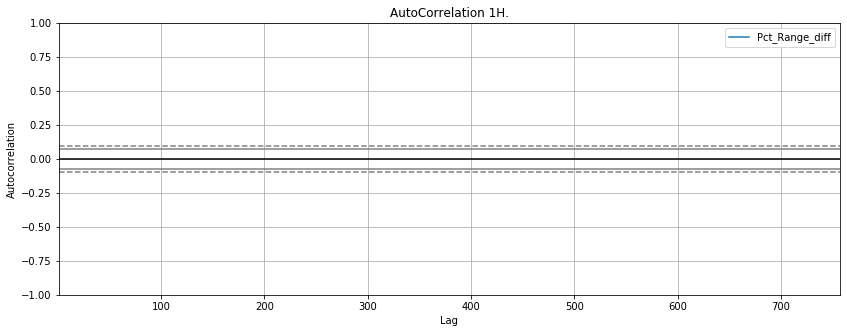

In [132]:
plt.figure(figsize=(14,5))
autocorrelation_plot(DF_EURUSD_ASK_1D['Pct_Range_diff'][:],label = 'Pct_Range_diff')
plt.title('AutoCorrelation 1H.')
pyplot.show()

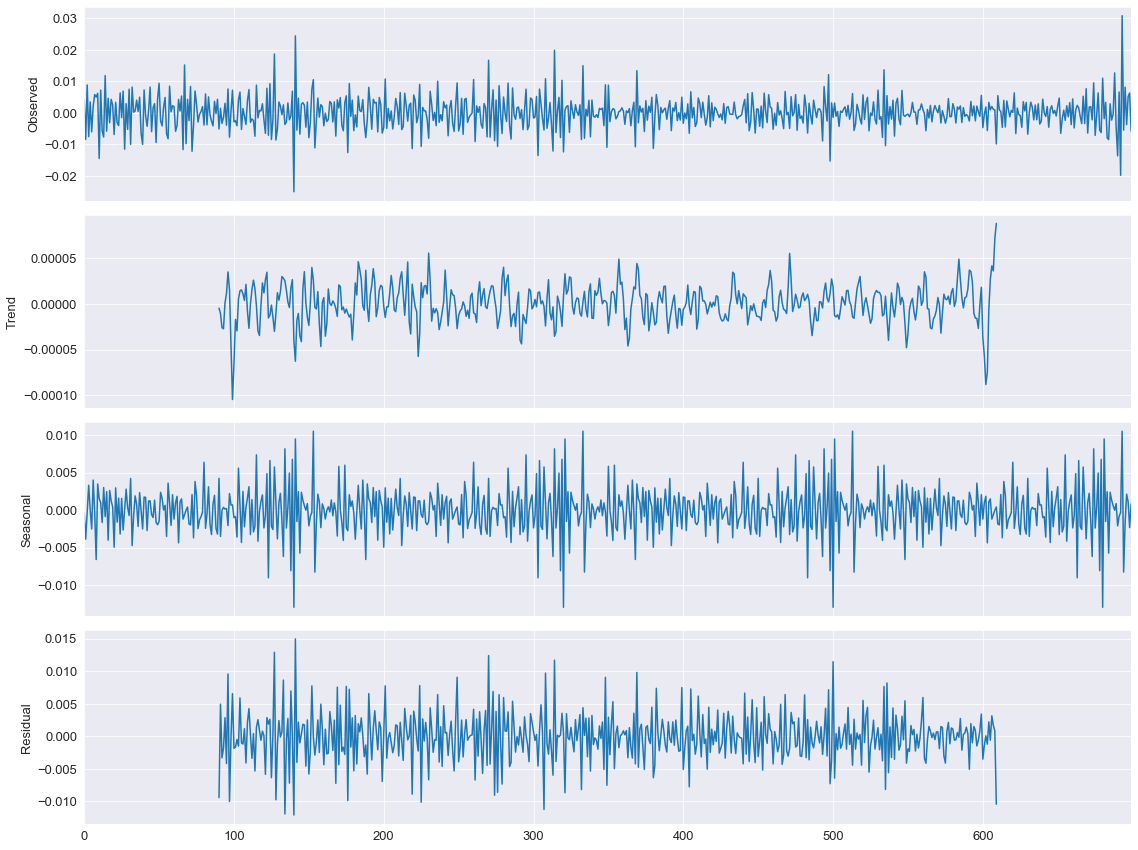

In [141]:
sns.set_style('darkgrid')
plt.rc('figure',figsize=(16,12))
plt.rc('font',size=13)

result = seasonal_decompose(DF_EURUSD_ASK_1D['Pct_Range_diff'][:700], model='additive', freq=180)
result.plot()
pyplot.show()

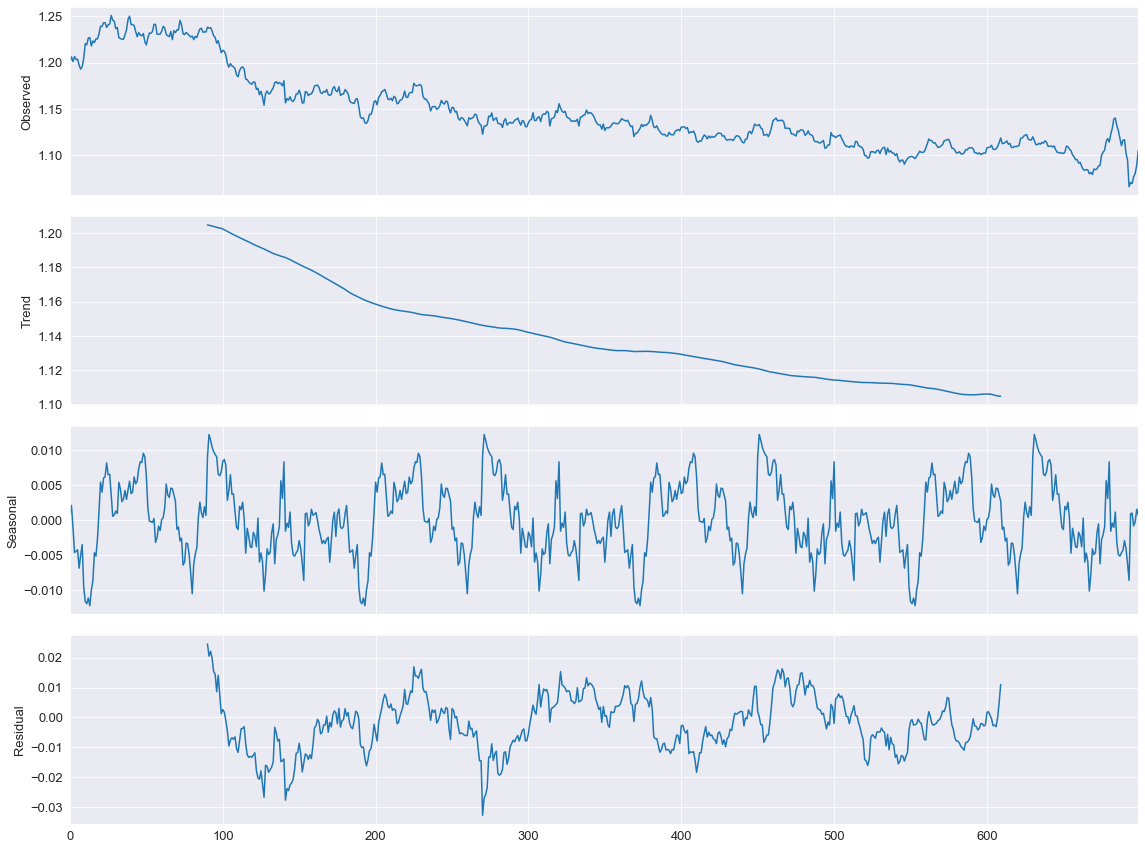

In [142]:
sns.set_style('darkgrid')
plt.rc('figure',figsize=(16,12))
plt.rc('font',size=13)

result = seasonal_decompose(DF_EURUSD_ASK_1D['Close'][:700], model='additive', freq=180)
result.plot()
pyplot.show()